## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0045382	total: 58.6ms	remaining: 58.6s
1:	learn: 0.9852503	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9655208	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9484004	total: 61.7ms	remaining: 15.4s
4:	learn: 0.9306118	total: 62.6ms	remaining: 12.5s
5:	learn: 0.9145347	total: 63.6ms	remaining: 10.5s
6:	learn: 0.8976368	total: 64.5ms	remaining: 9.16s
7:	learn: 0.8809317	total: 65.5ms	remaining: 8.12s
8:	learn: 0.8652186	total: 66.3ms	remaining: 7.3s
9:	learn: 0.8485678	total: 67.1ms	remaining: 6.64s
10:	learn: 0.8326731	total: 67.8ms	remaining: 6.1s
11:	learn: 0.8168455	total: 68.6ms	remaining: 5.65s
12:	learn: 0.8019848	total: 69.3ms	remaining: 5.26s
13:	learn: 0.7866252	total: 70.1ms	remaining: 4.94s
14:	learn: 0.7730996	total: 70.8ms	remaining: 4.65s
15:	learn: 0.7593153	total: 71.6ms	remaining: 4.4s
16:	learn: 0.7479241	total: 72.4ms	remaining: 4.18s
17:	learn: 0.7351161	total: 73.2ms	remaining: 3.99s
18:	learn: 0.7230949	total: 73.9ms	remaining: 3

58:	learn: 0.4353505	total: 108ms	remaining: 1.73s
59:	learn: 0.4324383	total: 109ms	remaining: 1.71s
60:	learn: 0.4281378	total: 110ms	remaining: 1.69s
61:	learn: 0.4240547	total: 111ms	remaining: 1.68s
62:	learn: 0.4201824	total: 112ms	remaining: 1.66s
63:	learn: 0.4173103	total: 113ms	remaining: 1.65s
64:	learn: 0.4139016	total: 114ms	remaining: 1.63s
65:	learn: 0.4100509	total: 115ms	remaining: 1.62s
66:	learn: 0.4064431	total: 116ms	remaining: 1.61s
67:	learn: 0.4023495	total: 117ms	remaining: 1.6s
68:	learn: 0.3985394	total: 117ms	remaining: 1.58s
69:	learn: 0.3952691	total: 119ms	remaining: 1.57s
70:	learn: 0.3918573	total: 119ms	remaining: 1.56s
71:	learn: 0.3879251	total: 120ms	remaining: 1.55s
72:	learn: 0.3854672	total: 121ms	remaining: 1.54s
73:	learn: 0.3824541	total: 122ms	remaining: 1.53s
74:	learn: 0.3798917	total: 123ms	remaining: 1.52s
75:	learn: 0.3771792	total: 124ms	remaining: 1.51s
76:	learn: 0.3741933	total: 125ms	remaining: 1.5s
77:	learn: 0.3716556	total: 126ms

155:	learn: 0.2577759	total: 192ms	remaining: 1.04s
156:	learn: 0.2571236	total: 193ms	remaining: 1.03s
157:	learn: 0.2563431	total: 194ms	remaining: 1.03s
158:	learn: 0.2556262	total: 195ms	remaining: 1.03s
159:	learn: 0.2548671	total: 195ms	remaining: 1.02s
160:	learn: 0.2540679	total: 196ms	remaining: 1.02s
161:	learn: 0.2533079	total: 197ms	remaining: 1.02s
162:	learn: 0.2529148	total: 198ms	remaining: 1.02s
163:	learn: 0.2520381	total: 199ms	remaining: 1.01s
164:	learn: 0.2513192	total: 200ms	remaining: 1.01s
165:	learn: 0.2504310	total: 201ms	remaining: 1.01s
166:	learn: 0.2497923	total: 201ms	remaining: 1s
167:	learn: 0.2491042	total: 202ms	remaining: 1s
168:	learn: 0.2486279	total: 203ms	remaining: 999ms
169:	learn: 0.2480020	total: 204ms	remaining: 995ms
170:	learn: 0.2476419	total: 205ms	remaining: 992ms
171:	learn: 0.2471496	total: 205ms	remaining: 988ms
172:	learn: 0.2466173	total: 206ms	remaining: 985ms
173:	learn: 0.2461384	total: 207ms	remaining: 982ms
174:	learn: 0.2455

284:	learn: 0.1858344	total: 299ms	remaining: 750ms
285:	learn: 0.1855292	total: 300ms	remaining: 749ms
286:	learn: 0.1849782	total: 301ms	remaining: 748ms
287:	learn: 0.1847526	total: 302ms	remaining: 746ms
288:	learn: 0.1843375	total: 303ms	remaining: 745ms
289:	learn: 0.1836765	total: 304ms	remaining: 743ms
290:	learn: 0.1830143	total: 304ms	remaining: 741ms
291:	learn: 0.1824141	total: 305ms	remaining: 740ms
292:	learn: 0.1821586	total: 306ms	remaining: 738ms
293:	learn: 0.1818840	total: 307ms	remaining: 737ms
294:	learn: 0.1813692	total: 308ms	remaining: 736ms
295:	learn: 0.1811642	total: 309ms	remaining: 734ms
296:	learn: 0.1809200	total: 309ms	remaining: 732ms
297:	learn: 0.1805163	total: 310ms	remaining: 731ms
298:	learn: 0.1799669	total: 311ms	remaining: 729ms
299:	learn: 0.1796519	total: 312ms	remaining: 728ms
300:	learn: 0.1794634	total: 313ms	remaining: 726ms
301:	learn: 0.1792354	total: 313ms	remaining: 724ms
302:	learn: 0.1789918	total: 314ms	remaining: 723ms
303:	learn: 

383:	learn: 0.1560327	total: 382ms	remaining: 613ms
384:	learn: 0.1556617	total: 383ms	remaining: 612ms
385:	learn: 0.1553479	total: 384ms	remaining: 611ms
386:	learn: 0.1552636	total: 385ms	remaining: 609ms
387:	learn: 0.1550036	total: 385ms	remaining: 608ms
388:	learn: 0.1548290	total: 386ms	remaining: 607ms
389:	learn: 0.1543916	total: 387ms	remaining: 606ms
390:	learn: 0.1542543	total: 388ms	remaining: 604ms
391:	learn: 0.1541205	total: 389ms	remaining: 603ms
392:	learn: 0.1539721	total: 390ms	remaining: 602ms
393:	learn: 0.1538274	total: 391ms	remaining: 601ms
394:	learn: 0.1535371	total: 391ms	remaining: 600ms
395:	learn: 0.1530300	total: 392ms	remaining: 598ms
396:	learn: 0.1529627	total: 393ms	remaining: 597ms
397:	learn: 0.1527152	total: 394ms	remaining: 596ms
398:	learn: 0.1522990	total: 395ms	remaining: 595ms
399:	learn: 0.1522753	total: 396ms	remaining: 594ms
400:	learn: 0.1519901	total: 397ms	remaining: 593ms
401:	learn: 0.1518238	total: 398ms	remaining: 592ms
402:	learn: 

509:	learn: 0.1264445	total: 490ms	remaining: 471ms
510:	learn: 0.1264039	total: 491ms	remaining: 470ms
511:	learn: 0.1261893	total: 492ms	remaining: 469ms
512:	learn: 0.1258851	total: 493ms	remaining: 468ms
513:	learn: 0.1256626	total: 494ms	remaining: 467ms
514:	learn: 0.1253901	total: 495ms	remaining: 466ms
515:	learn: 0.1251586	total: 496ms	remaining: 465ms
516:	learn: 0.1248182	total: 496ms	remaining: 464ms
517:	learn: 0.1245521	total: 498ms	remaining: 463ms
518:	learn: 0.1241967	total: 499ms	remaining: 462ms
519:	learn: 0.1239354	total: 500ms	remaining: 461ms
520:	learn: 0.1238961	total: 501ms	remaining: 460ms
521:	learn: 0.1238016	total: 501ms	remaining: 459ms
522:	learn: 0.1234691	total: 502ms	remaining: 458ms
523:	learn: 0.1234534	total: 503ms	remaining: 457ms
524:	learn: 0.1234395	total: 504ms	remaining: 456ms
525:	learn: 0.1234144	total: 505ms	remaining: 455ms
526:	learn: 0.1231757	total: 505ms	remaining: 454ms
527:	learn: 0.1230449	total: 506ms	remaining: 453ms
528:	learn: 

601:	learn: 0.1093506	total: 572ms	remaining: 378ms
602:	learn: 0.1091293	total: 574ms	remaining: 378ms
603:	learn: 0.1090983	total: 574ms	remaining: 377ms
604:	learn: 0.1090664	total: 575ms	remaining: 376ms
605:	learn: 0.1089672	total: 576ms	remaining: 375ms
606:	learn: 0.1087693	total: 577ms	remaining: 373ms
607:	learn: 0.1086461	total: 578ms	remaining: 373ms
608:	learn: 0.1084952	total: 579ms	remaining: 371ms
609:	learn: 0.1082921	total: 579ms	remaining: 370ms
610:	learn: 0.1081087	total: 580ms	remaining: 369ms
611:	learn: 0.1079110	total: 581ms	remaining: 368ms
612:	learn: 0.1077593	total: 582ms	remaining: 367ms
613:	learn: 0.1075031	total: 583ms	remaining: 366ms
614:	learn: 0.1073605	total: 583ms	remaining: 365ms
615:	learn: 0.1071840	total: 584ms	remaining: 364ms
616:	learn: 0.1070092	total: 585ms	remaining: 363ms
617:	learn: 0.1067999	total: 586ms	remaining: 362ms
618:	learn: 0.1066328	total: 587ms	remaining: 361ms
619:	learn: 0.1065319	total: 588ms	remaining: 360ms
620:	learn: 

732:	learn: 0.0904510	total: 681ms	remaining: 248ms
733:	learn: 0.0903836	total: 682ms	remaining: 247ms
734:	learn: 0.0902385	total: 683ms	remaining: 246ms
735:	learn: 0.0901167	total: 684ms	remaining: 245ms
736:	learn: 0.0899387	total: 685ms	remaining: 244ms
737:	learn: 0.0898914	total: 685ms	remaining: 243ms
738:	learn: 0.0896793	total: 686ms	remaining: 242ms
739:	learn: 0.0895029	total: 687ms	remaining: 241ms
740:	learn: 0.0894778	total: 688ms	remaining: 240ms
741:	learn: 0.0893040	total: 689ms	remaining: 239ms
742:	learn: 0.0891927	total: 690ms	remaining: 239ms
743:	learn: 0.0891066	total: 691ms	remaining: 238ms
744:	learn: 0.0890620	total: 692ms	remaining: 237ms
745:	learn: 0.0889192	total: 693ms	remaining: 236ms
746:	learn: 0.0887071	total: 694ms	remaining: 235ms
747:	learn: 0.0885422	total: 695ms	remaining: 234ms
748:	learn: 0.0883003	total: 695ms	remaining: 233ms
749:	learn: 0.0881303	total: 696ms	remaining: 232ms
750:	learn: 0.0879390	total: 697ms	remaining: 231ms
751:	learn: 

828:	learn: 0.0795646	total: 763ms	remaining: 157ms
829:	learn: 0.0795339	total: 764ms	remaining: 156ms
830:	learn: 0.0794277	total: 764ms	remaining: 155ms
831:	learn: 0.0792122	total: 765ms	remaining: 155ms
832:	learn: 0.0790576	total: 766ms	remaining: 154ms
833:	learn: 0.0789021	total: 767ms	remaining: 153ms
834:	learn: 0.0788615	total: 768ms	remaining: 152ms
835:	learn: 0.0787183	total: 769ms	remaining: 151ms
836:	learn: 0.0785780	total: 770ms	remaining: 150ms
837:	learn: 0.0784256	total: 770ms	remaining: 149ms
838:	learn: 0.0782116	total: 771ms	remaining: 148ms
839:	learn: 0.0781571	total: 772ms	remaining: 147ms
840:	learn: 0.0781128	total: 773ms	remaining: 146ms
841:	learn: 0.0780712	total: 774ms	remaining: 145ms
842:	learn: 0.0779850	total: 775ms	remaining: 144ms
843:	learn: 0.0778787	total: 776ms	remaining: 143ms
844:	learn: 0.0778267	total: 777ms	remaining: 142ms
845:	learn: 0.0777314	total: 778ms	remaining: 142ms
846:	learn: 0.0775119	total: 778ms	remaining: 141ms
847:	learn: 

955:	learn: 0.0663815	total: 872ms	remaining: 40.1ms
956:	learn: 0.0663654	total: 872ms	remaining: 39.2ms
957:	learn: 0.0662539	total: 874ms	remaining: 38.3ms
958:	learn: 0.0662167	total: 875ms	remaining: 37.4ms
959:	learn: 0.0661395	total: 876ms	remaining: 36.5ms
960:	learn: 0.0660819	total: 876ms	remaining: 35.6ms
961:	learn: 0.0659753	total: 877ms	remaining: 34.6ms
962:	learn: 0.0658495	total: 878ms	remaining: 33.7ms
963:	learn: 0.0658380	total: 879ms	remaining: 32.8ms
964:	learn: 0.0657430	total: 880ms	remaining: 31.9ms
965:	learn: 0.0657083	total: 881ms	remaining: 31ms
966:	learn: 0.0656832	total: 881ms	remaining: 30.1ms
967:	learn: 0.0655683	total: 882ms	remaining: 29.2ms
968:	learn: 0.0655287	total: 883ms	remaining: 28.3ms
969:	learn: 0.0654229	total: 884ms	remaining: 27.3ms
970:	learn: 0.0653581	total: 885ms	remaining: 26.4ms
971:	learn: 0.0653151	total: 886ms	remaining: 25.5ms
972:	learn: 0.0652398	total: 887ms	remaining: 24.6ms
973:	learn: 0.0651792	total: 887ms	remaining: 23

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

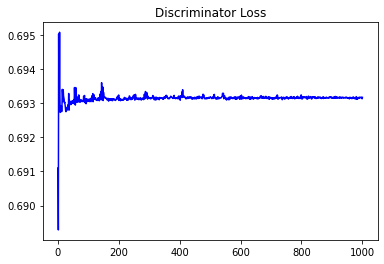

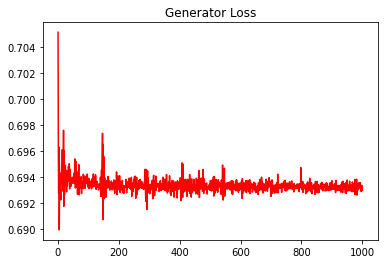

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11446531366058527


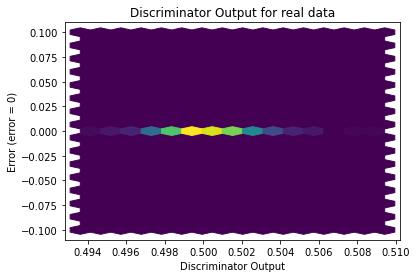

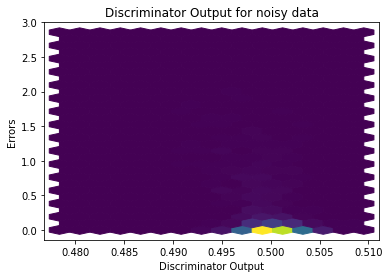

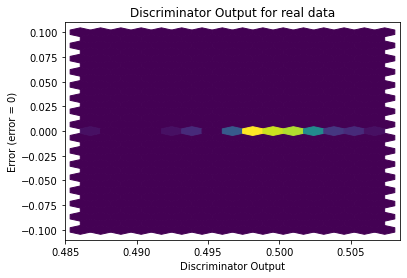

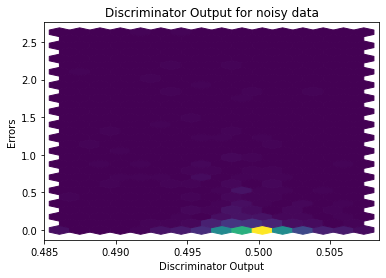

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


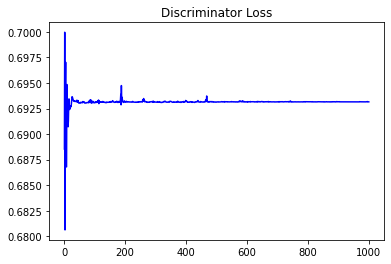

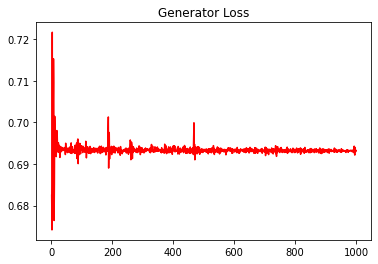

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07815569013349502


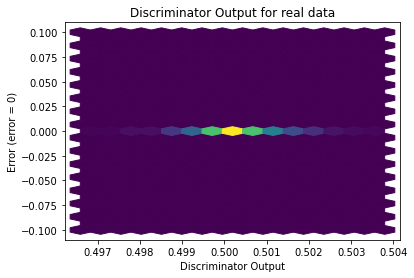

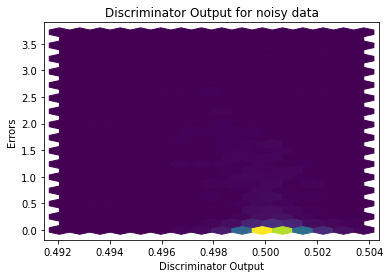

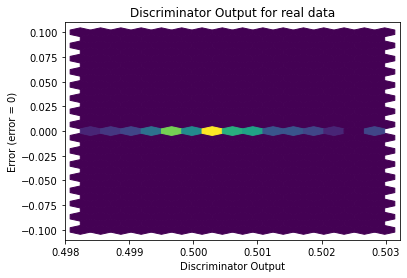

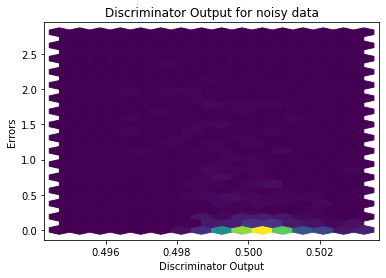

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3311]], requires_grad=True)
